In [22]:
# ============================================
# 1. Imports
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import RAW_DIR

plt.style.use("seaborn-v0_8")
sns.set_palette("tab10")

train = pd.read_csv(RAW_DIR / "train.csv")
store = pd.read_csv(RAW_DIR /"store.csv")

df = train.merge(store, on="Store", how="left")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

/var/folders/k3/qqd44s9n4xzb5ckz2hrv2pb80000gn/T/ipykernel_94003/265682362.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(RAW_DIR / "train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


2. Basic Overview

In [23]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,NaN


Missing values:

In [25]:
train.isna().mean().sort_values(ascending=False)

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

Text(0.5, 1.0, 'Missing Values Map')

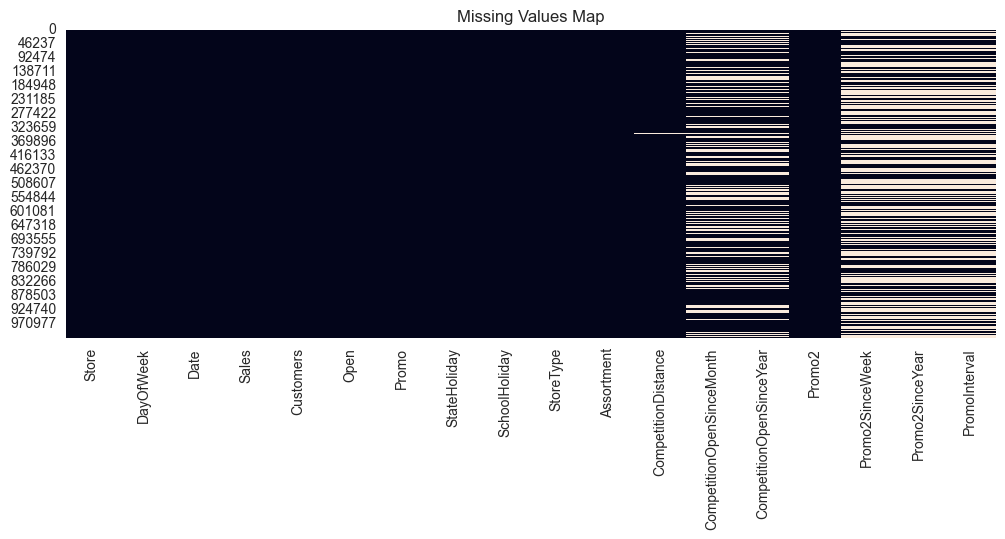

In [26]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Map")


3. Merge sales + store metadata

In [6]:
df = train.merge(store, on="Store", how="left")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


4. Sales Distribution

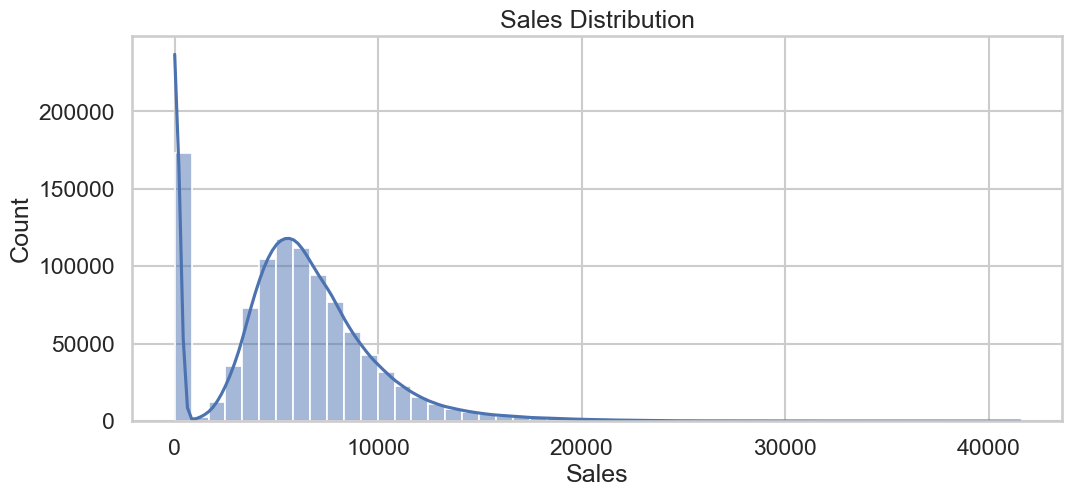

In [7]:
plt.figure(figsize=(12,5))
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

5. Time Series — Sales Over Time

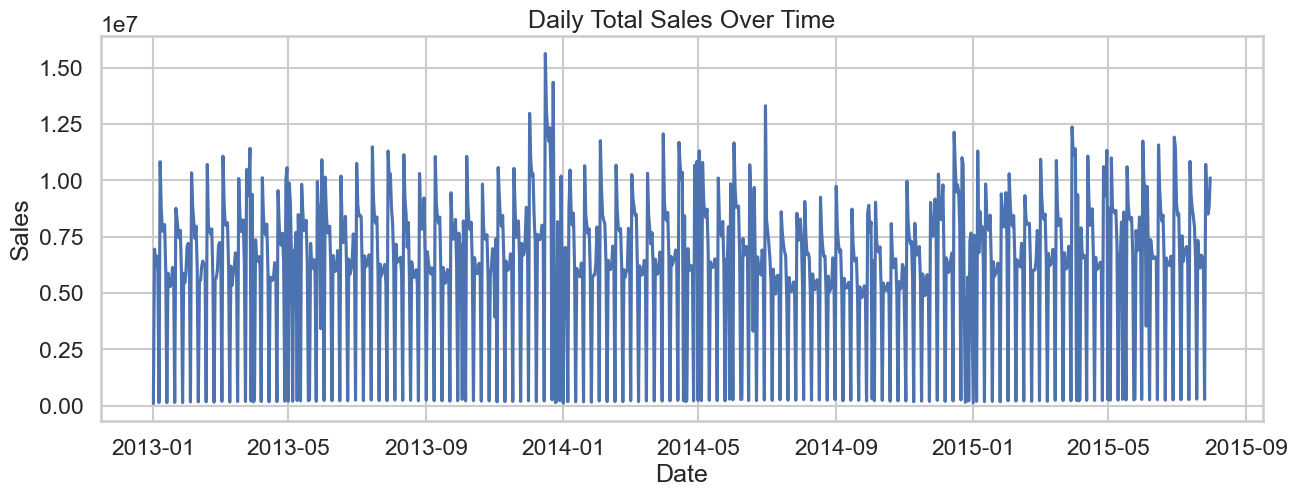

In [8]:
daily = df.groupby("Date")["Sales"].sum()

plt.figure(figsize=(15,5))
plt.plot(daily.index, daily.values)
plt.title("Daily Total Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

6. Sales by Day of Week

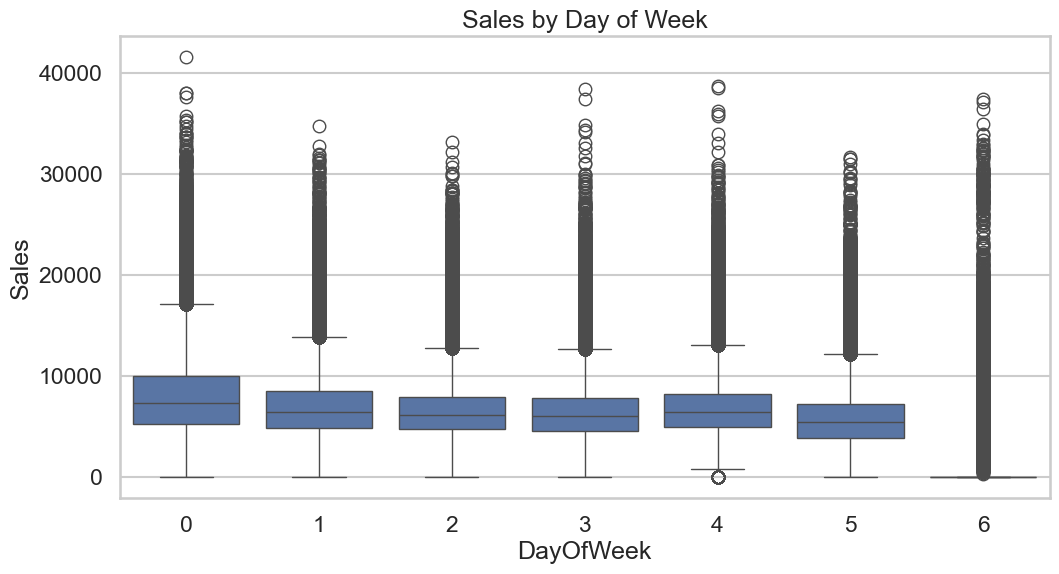

In [9]:
df["DayOfWeek"] = df["Date"].dt.dayofweek

sns.boxplot(data=df, x="DayOfWeek", y="Sales")
plt.title("Sales by Day of Week")
plt.show()

7. Sales by Month

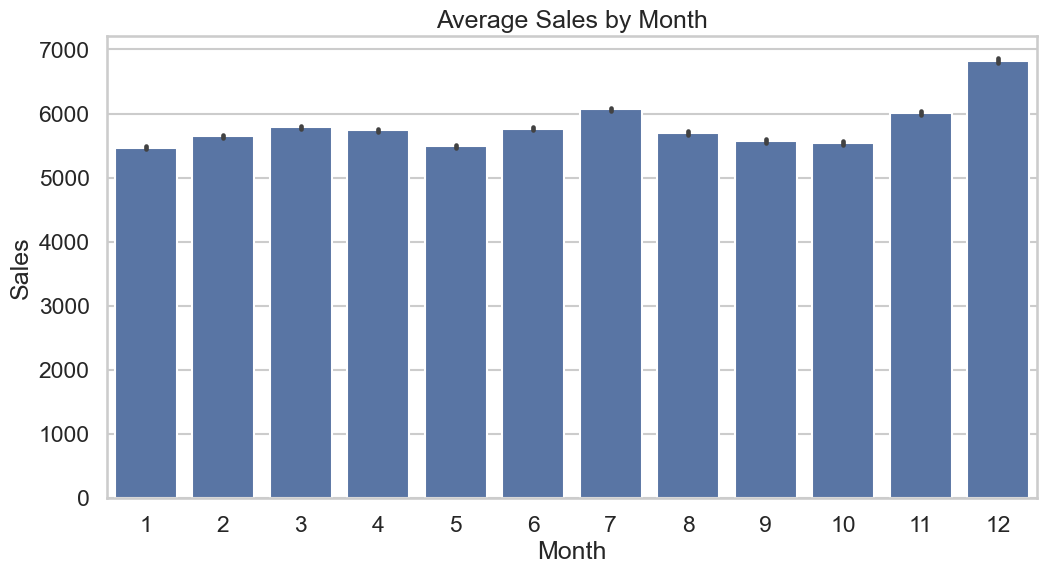

In [10]:
df["Month"] = df["Date"].dt.month

sns.barplot(data=df, x="Month", y="Sales", estimator=np.mean)
plt.title("Average Sales by Month")
plt.show()

8. Effect of Promo


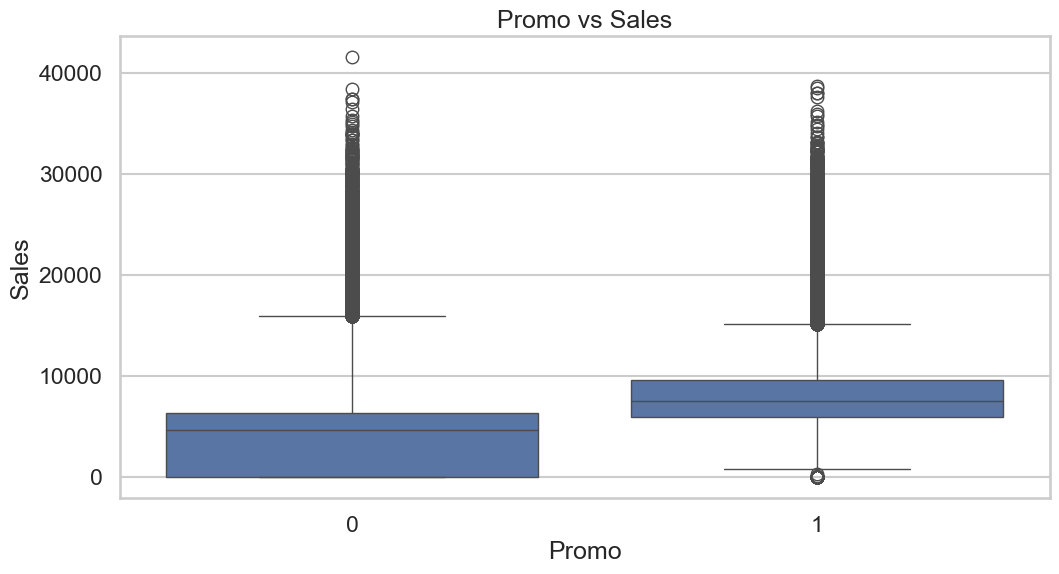

In [11]:
sns.boxplot(data=df, x="Promo", y="Sales")
plt.title("Promo vs Sales")
plt.show()

9. StoreType Impact on Sales

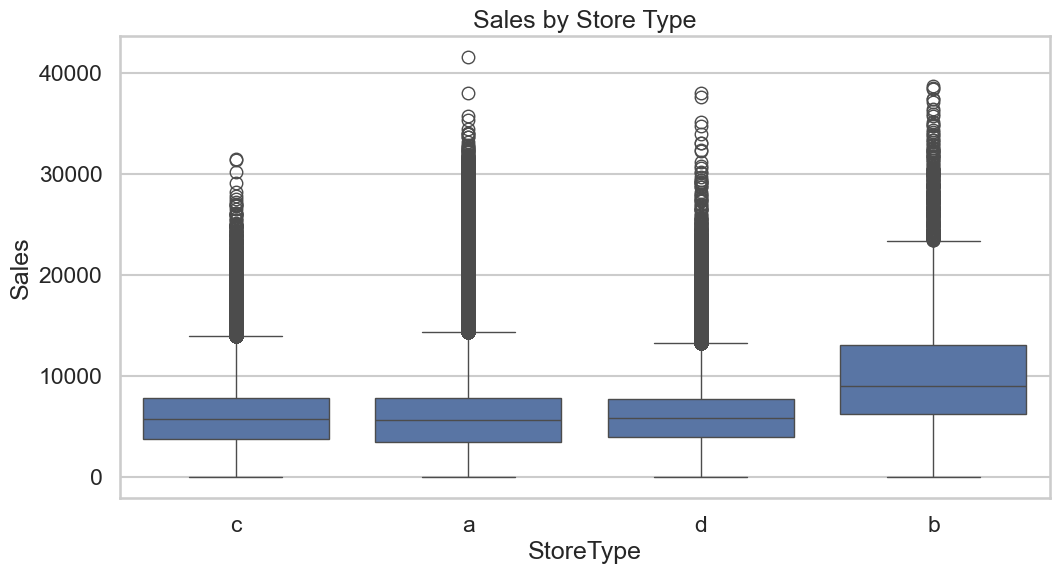

In [12]:
sns.boxplot(data=df, x="StoreType", y="Sales")
plt.title("Sales by Store Type")
plt.show()

9. StoreType Impact on Sales

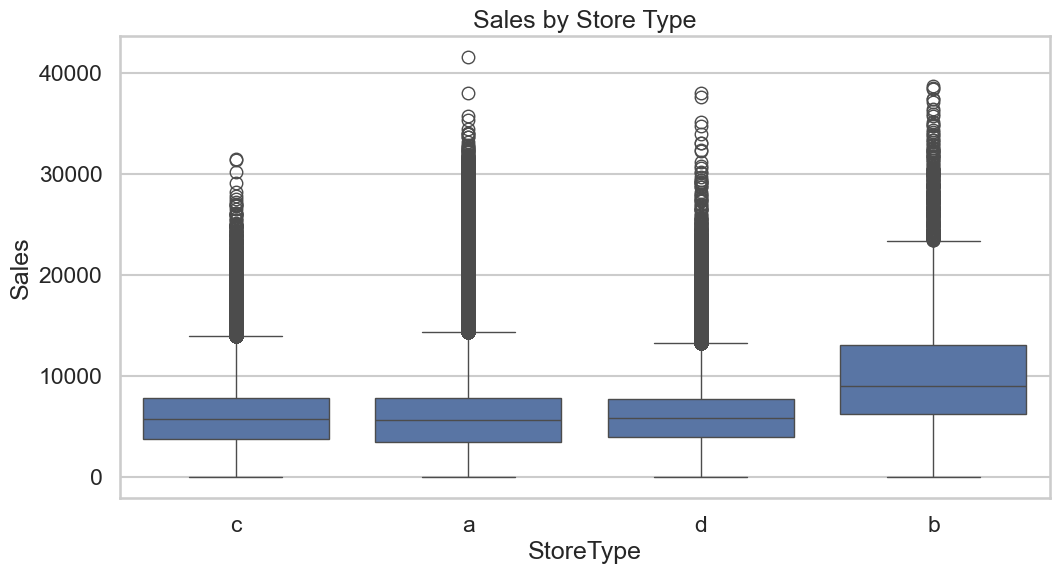

In [13]:
sns.boxplot(data=df, x="StoreType", y="Sales")
plt.title("Sales by Store Type")
plt.show()

10. Assortment Impact

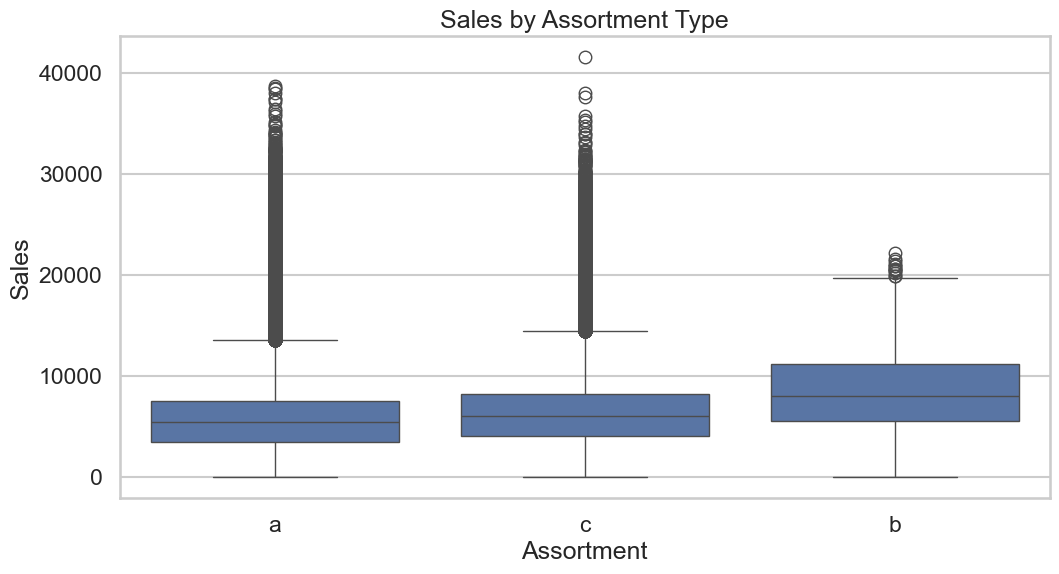

In [14]:
sns.boxplot(data=df, x="Assortment", y="Sales")
plt.title("Sales by Assortment Type")
plt.show()

11. Correlation Heatmap (Numeric Only)

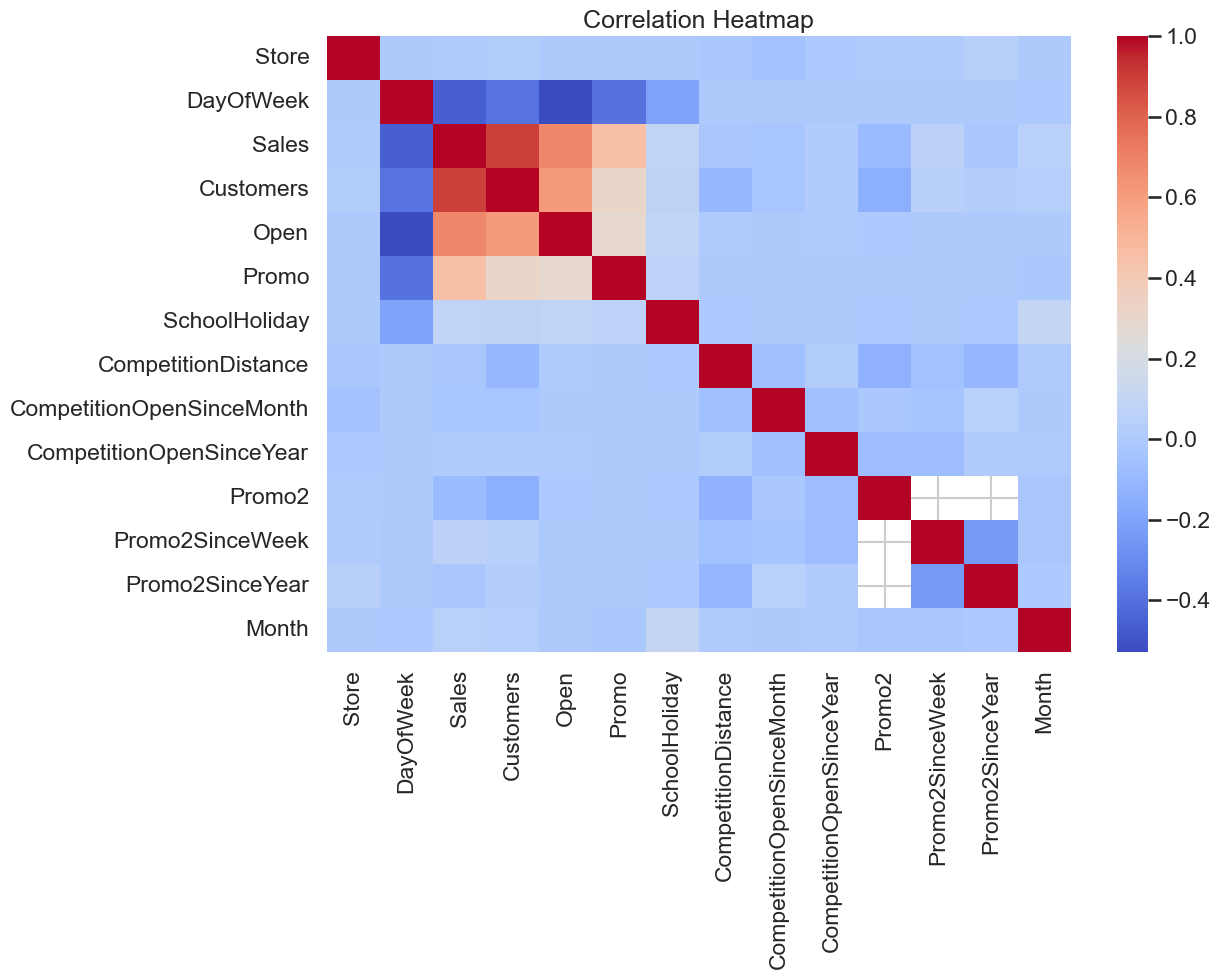

In [15]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

12. Competition Distance Analysis

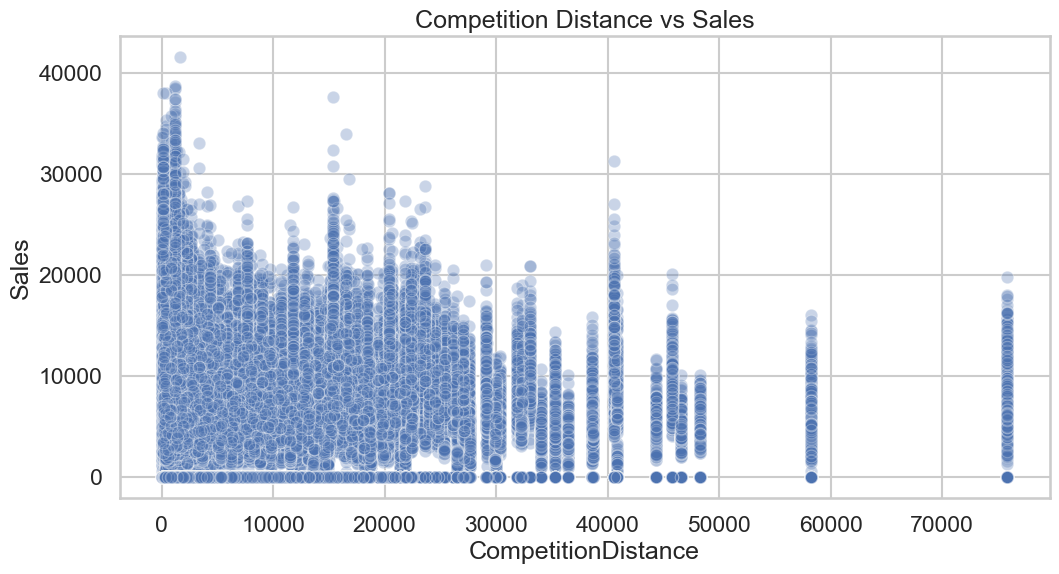

In [16]:
sns.scatterplot(data=df, x="CompetitionDistance", y="Sales", alpha=0.3)
plt.title("Competition Distance vs Sales")
plt.show()

13. Promo2 Effect

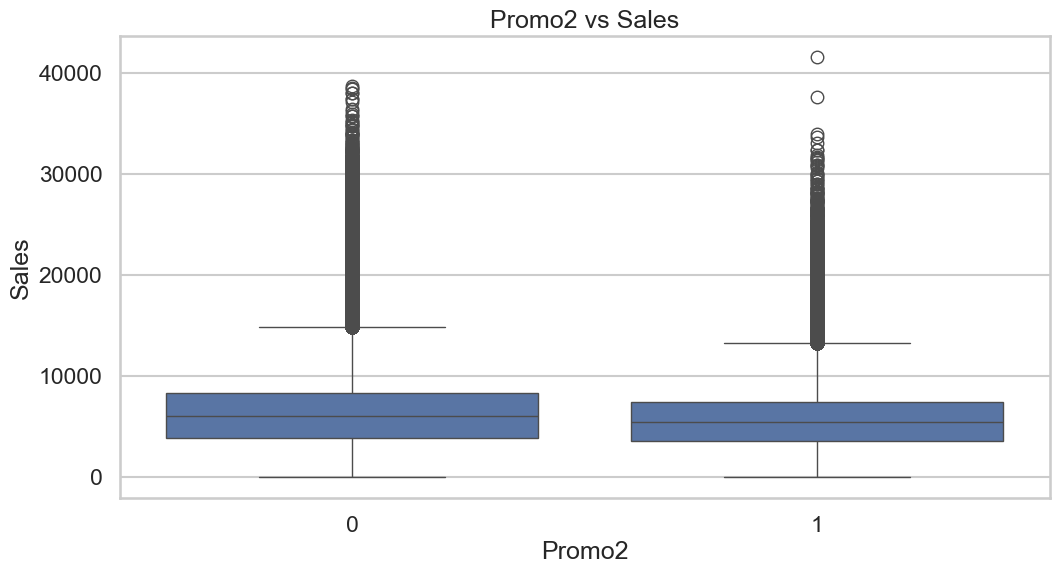

In [17]:
sns.boxplot(data=df, x="Promo2", y="Sales")
plt.title("Promo2 vs Sales")
plt.show()

14. Check Holidays Effect

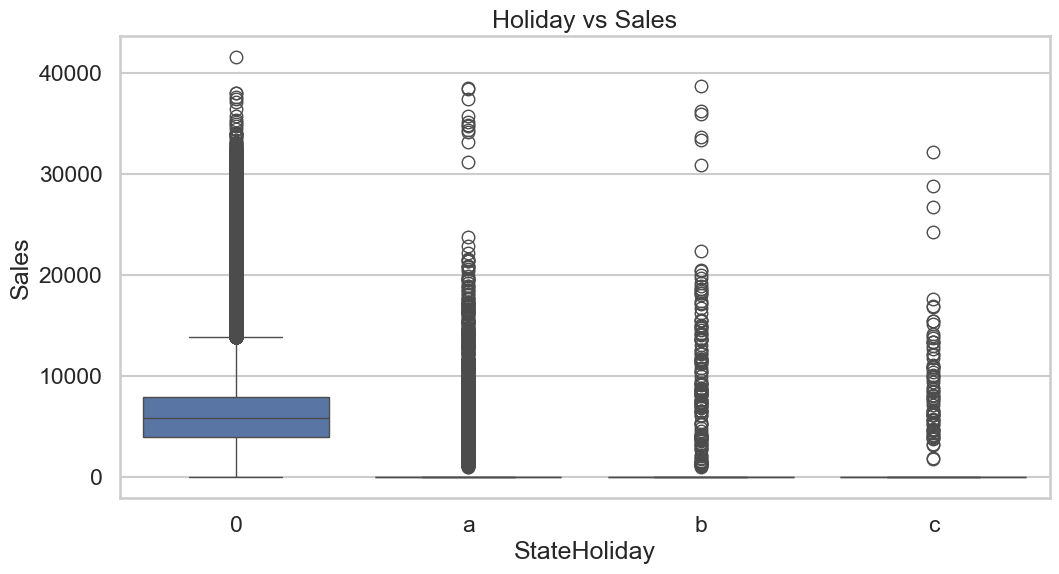

In [18]:
sns.boxplot(data=df, x="StateHoliday", y="Sales")
plt.title("Holiday vs Sales")
plt.show()

15. Store-Level Time Series Example

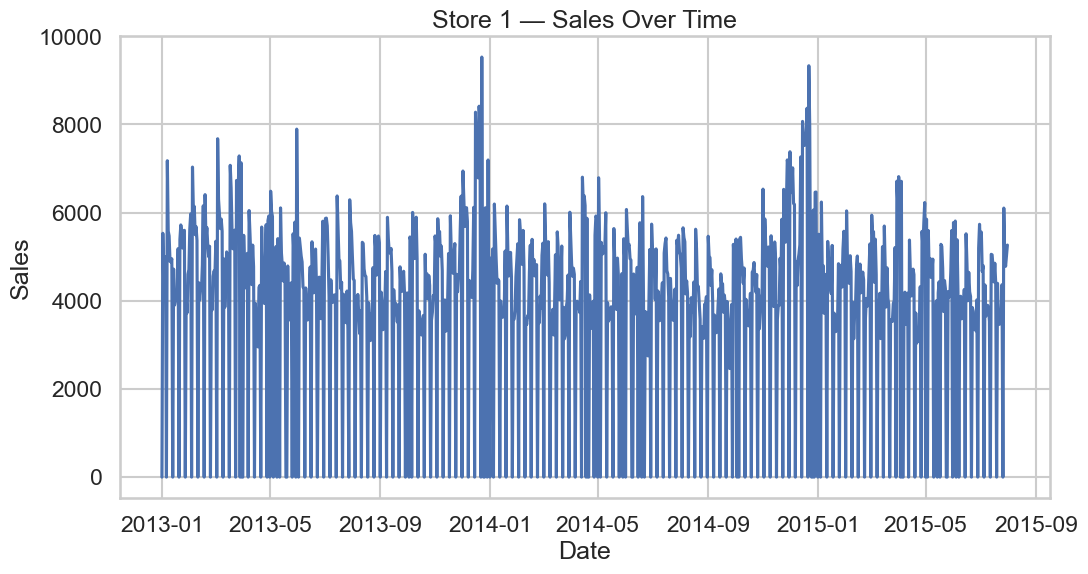

In [19]:
store_id = 1
store_ts = df[df.Store == store_id].groupby("Date")["Sales"].sum()

plt.plot(store_ts.index, store_ts.values)
plt.title(f"Store {store_id} — Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

16. Rolling Means Example

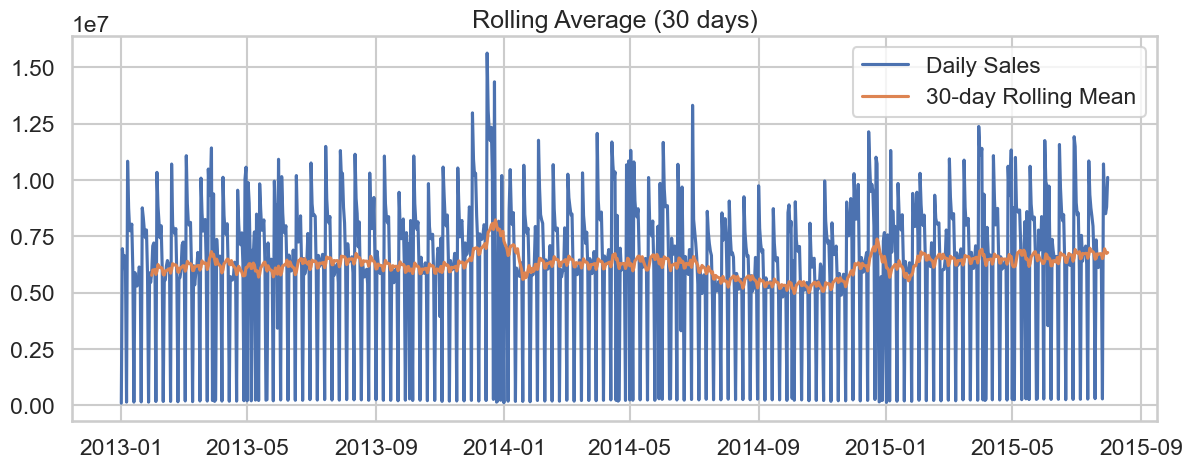

In [20]:
daily = df.groupby("Date")["Sales"].sum()
daily_rolling = daily.rolling(30).mean()

plt.figure(figsize=(14,5))
plt.plot(daily, label="Daily Sales")
plt.plot(daily_rolling, label="30-day Rolling Mean")
plt.legend()
plt.title("Rolling Average (30 days)")
plt.show()

17. Summary & Insights Section

# Summary of Findings

- Clear seasonality patterns (weekly + monthly)
- Promo increases sales significantly
- Strong variance between StoreType and Assortment groups
- CompetitionDistance has weak but noticeable effect
- Large variance in store-level sales — models must be store-specific
- Rolling windows give smooth signals → useful for XGBoost
- Holidays impact depends on type
